In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("WeatherDataP.csv")

data

,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83
5,1014.52,0.85
6,1014.16,0.83
7,1014.24,0.78
8,1014.25,0.72
9,1013.96,0.61


Text(0, 0.5, 'Humidity')

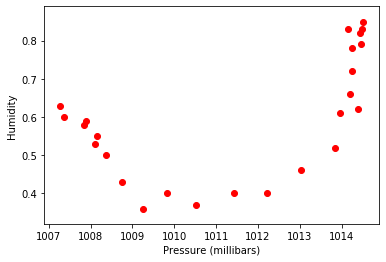

In [2]:

X = data[["Pressure (millibars)"]]
y = data.Humidity

# Produce a scatter graph of Humidity against Pressure
plt.scatter(X, y, c = "red")
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")

In [9]:
# Spliting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3.0, random_state=0)

In [10]:
X_train

,Pressure (millibars)
14,1010.52
1,1014.20
10,1013.85
13,1011.44
8,1014.25
6,1014.16
18,1008.36
4,1014.49
9,1013.96
7,1014.24


In [11]:
X_test

,Pressure (millibars)
5,1014.52
2,1014.47
19,1008.11
16,1009.26
11,1013.04
22,1007.89
17,1008.76
24,1007.26
23,1007.36


In [46]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly,y_train)

lin = LinearRegression()
lin.fit(X_poly, y_train)


X_poly


array([[1.00000000e+00, 1.01425000e+03, 1.02870306e+06, 1.04336208e+09,
        1.05822999e+12],
       [1.00000000e+00, 1.01416000e+03, 1.02852051e+06, 1.04308436e+09,
        1.05785443e+12],
       [1.00000000e+00, 1.00836000e+03, 1.01678989e+06, 1.02529025e+09,
        1.03386168e+12],
       [1.00000000e+00, 1.01449000e+03, 1.02918996e+06, 1.04410292e+09,
        1.05923197e+12],
       [1.00000000e+00, 1.01396000e+03, 1.02811488e+06, 1.04246737e+09,
        1.05702021e+12],
       [1.00000000e+00, 1.01424000e+03, 1.02868278e+06, 1.04333122e+09,
        1.05818826e+12],
       [1.00000000e+00, 1.00815000e+03, 1.01636642e+06, 1.02464981e+09,
        1.03300070e+12],
       [1.00000000e+00, 1.01445000e+03, 1.02910880e+06, 1.04397942e+09,
        1.05906493e+12],
       [1.00000000e+00, 1.01440000e+03, 1.02900736e+06, 1.04382507e+09,
        1.05885615e+12],
       [1.00000000e+00, 1.00785000e+03, 1.01576162e+06, 1.02373535e+09,
        1.03177167e+12],
       [1.00000000e+00, 1.0098

In [47]:
y_out = lin.predict(poly.fit_transform([[1007]]))
print(y_out)

[0.69149494]


In [48]:

y_pred = lin.predict(poly.fit_transform(X_test))

print(y_pred)



[0.80556479 0.79201956 0.54574254 0.42975307 0.50004399 0.57246843
 0.47478911 0.65516118 0.64149617 0.36258225 0.72295165 0.6433945
 0.36502032]


In [49]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
print(df)

    Real Values  Predicted Values
5          0.85          0.805565
2          0.79          0.792020
19         0.53          0.545743
16         0.36          0.429753
11         0.46          0.500044
22         0.59          0.572468
17         0.43          0.474789
24         0.63          0.655161
23         0.60          0.641496
14         0.37          0.362582
1          0.66          0.722952
10         0.52          0.643394
13         0.40          0.365020


In [50]:
print(lin.score(X_poly, y_train)*100)

83.6087168940038


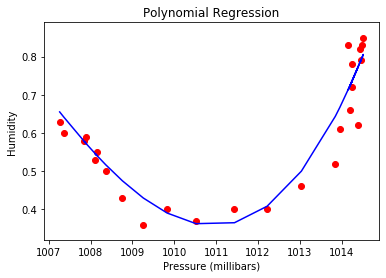

In [51]:
plt.scatter(X, y, color='red')
plt.plot(X, lin.predict(poly.fit_transform(X)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")
plt.show()